# Exemplo 1: Notas

In [1]:
# Importando os pacotes
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1.1. Base de dados

In [2]:
# Importando os dados
df = pd.read_excel("datasets/notas_fatorial.xlsx")

In [3]:
#%% Visualizando os dados e cada uma das variáveis

df


,estudante,finanças,custos,marketing,atuária
0,Gabriela,5.8,4.0,1.0,6.0
1,Luiz Felipe,3.1,3.0,10.0,2.0
2,Patrícia,3.1,4.0,4.0,4.0
3,Gustavo,10.0,8.0,8.0,8.0
4,Letícia,3.4,2.0,3.2,3.2
...,...,...,...,...,...
95,Sheila,7.7,4.3,5.2,5.1
96,Pedro,9.0,6.0,4.0,9.8
97,Horácio,9.3,6.0,7.0,7.0
98,Leandro,9.0,6.5,3.0,9.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   finanças   100 non-null    float64
 2   custos     100 non-null    float64
 3   marketing  100 non-null    float64
 4   atuária    100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [5]:
# Estatísticas descritivas
summary = df.describe(include = 'all')
summary

,estudante,finanças,custos,marketing,atuária
count,100,100.000000,100.000000,100.000000,100.000000
unique,100,NaN,NaN,NaN,NaN
top,Gabriela,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,5.834000,4.717000,5.668000,5.314000
std,NaN,3.122749,2.455999,2.828351,2.513078
min,NaN,0.600000,1.900000,1.000000,1.700000
25%,NaN,3.100000,2.900000,3.000000,3.200000
50%,NaN,5.800000,4.000000,6.000000,5.000000
75%,NaN,9.000000,6.000000,8.000000,7.025000


In [6]:
#%% Separando somente as variáveis quantitativas do banco de dados

df_pca = df[["finanças", "custos", "marketing", "atuária"]]

df_pca

,finanças,custos,marketing,atuária
0,5.8,4.0,1.0,6.0
1,3.1,3.0,10.0,2.0
2,3.1,4.0,4.0,4.0
3,10.0,8.0,8.0,8.0
4,3.4,2.0,3.2,3.2
...,...,...,...,...
95,7.7,4.3,5.2,5.1
96,9.0,6.0,4.0,9.8
97,9.3,6.0,7.0,7.0
98,9.0,6.5,3.0,9.0


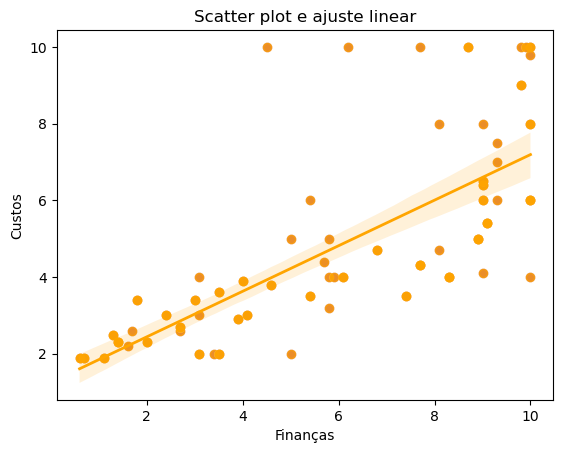

In [7]:
# Scatter e ajuste linear entre as variáveis 'custos' e 'finanças'

# Scatter plot e ajuste linear
sns.scatterplot(data=df, x='finanças', y='custos', color='darkorchid', s=50)
sns.regplot(data=df, x='finanças', y='custos', color='orange', line_kws={'linewidth': 2})

# Configurações dos eixos e do título
plt.xlabel('Finanças')
plt.ylabel('Custos')
plt.title('Scatter plot e ajuste linear')

# Exibição do gráfico
plt.show()

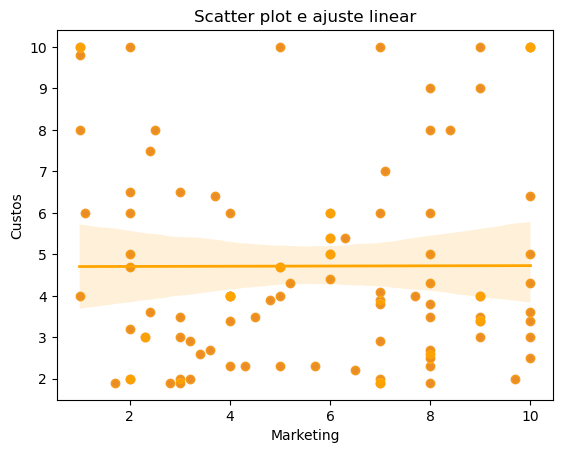

In [8]:
# Scatter e ajuste linear entre as variáveis 'custos' e 'marketing'

# Scatter plot e ajuste linear
sns.scatterplot(data=df, x='marketing', y='custos', color='darkorchid', s=50)
sns.regplot(data=df, x='marketing', y='custos', color='orange', line_kws={'linewidth': 2})

# Configurações dos eixos e do título
plt.xlabel('Marketing')
plt.ylabel('Custos')
plt.title('Scatter plot e ajuste linear')

# Exibição do gráfico
plt.show()

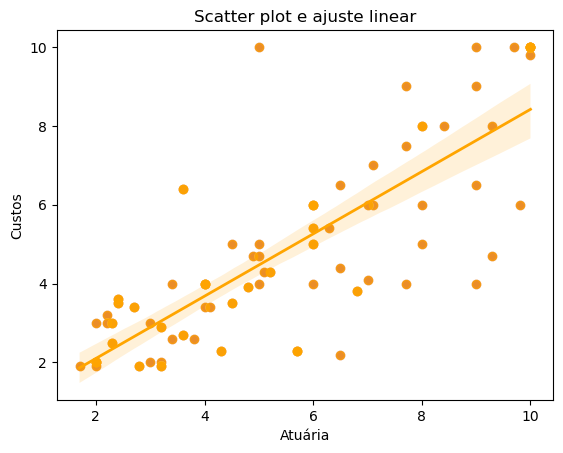

In [9]:
# Scatter e ajuste linear entre as variáveis 'custos' e 'atuária'

# Scatter plot e ajuste linear
sns.scatterplot(data=df, x='atuária', y='custos', color='darkorchid', s=50)
sns.regplot(data=df, x='atuária', y='custos', color='orange', line_kws={'linewidth': 2})

# Configurações dos eixos e do título
plt.xlabel('Atuária')
plt.ylabel('Custos')
plt.title('Scatter plot e ajuste linear')

# Exibição do gráfico
plt.show()

## 1.2. PCA

### 1º Passo: Correlação de Pearson

In [10]:
#%% Matriz de correlaçãoes entre as variáveis

matriz_corr = pg.rcorr(df_pca, method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
matriz_corr


,finanças,custos,marketing,atuária
finanças,-,***,,***
custos,0.7556,-,,***
marketing,-0.0295,0.0029,-,
atuária,0.7109,0.8081,-0.0443,-


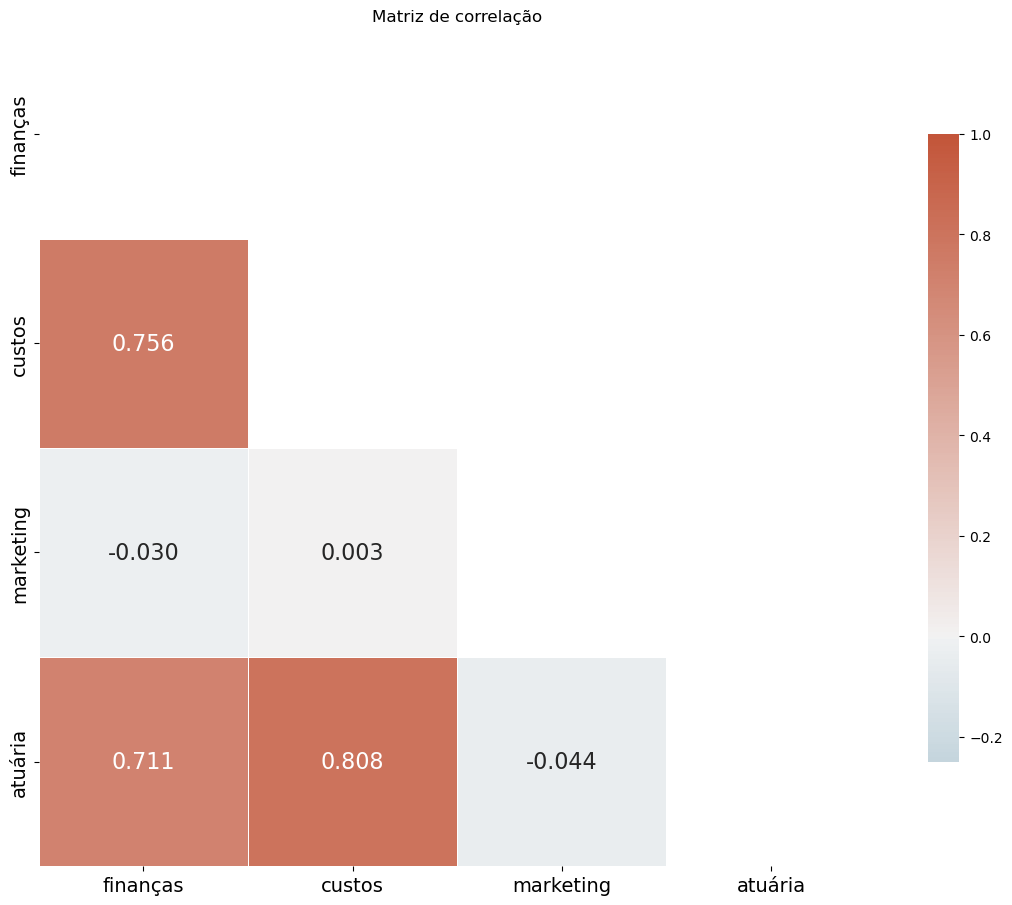

In [11]:
#%% Outra maneira de plotar as mesmas informações

corr = df_pca.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(df_pca.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Matriz de correlação')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

### 2º Passo: Teste de Esferecidade de Bartlett

In [12]:
#%% Teste de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(df_pca)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 191.8790997038087
p-value : 1.0139139940945663e-38


### 3º Passo: PCA

In [13]:
#%% Definindo a PCA (procedimento preliminar)

fa = FactorAnalyzer()
fa.fit(df_pca)

FactorAnalyzer(rotation_kwargs={})

In [14]:
#%% Obtendo os Eigenvalues (autovalores)

ev, v = fa.get_eigenvalues()

print(ev)

# Temos 4 autovalores para este exemplo, pois são 4 variáveis

# Critério de Kaiser

# Verificar autovalores com valores maiores que 1
# Existem dois componentes acima de 1


[2.51812681 1.0003793  0.29761585 0.18387804]


In [15]:
#%% Parametrizando a PCA para dois fatores (autovalores > 1)

fa.set_params(n_factors = 2, method = 'principal', rotation = None)
fa.fit(df_pca)

FactorAnalyzer(method='principal', n_factors=2, rotation=None,
               rotation_kwargs={})

In [16]:
#%% Eigenvalues, variâncias e variâncias acumulada

eigen_fatores = fa.get_factor_variance()
eigen_fatores

tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

tabela_eigen

,Autovalor,Variância,Variância Acumulada
Fator 1,2.518127,0.629532,0.629532
Fator 2,1.000379,0.250095,0.879627


In [17]:
#%% Determinando as cargas fatoriais

cargas_fatores = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = df_pca.columns
tabela_cargas

tabela_cargas

,Fator 1,Fator 2
finanças,0.895398,0.007086
custos,0.934033,0.048581
marketing,-0.042466,0.998933
atuária,0.917697,-0.010133


In [18]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = df_pca.columns


tabela_comunalidades

,Comunalidades
finanças,0.801788
custos,0.874778
marketing,0.999670
atuária,0.842271


In [19]:
#%% Resultados dos fatores para as observações do dataset (predict)

predict_fatores= pd.DataFrame(fa.transform(df_pca))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]

predict_fatores

,Fator 1,Fator 2
0,0.015232,-1.673452
1,-1.082468,1.510196
2,-0.603231,-0.607015
3,1.352586,0.891321
4,-0.984279,-0.926699
...,...,...
95,0.121867,-0.169227
96,1.220881,-0.577316
97,0.829146,0.499201
98,1.186171,-0.918969


In [20]:
# Adicionando ao dataset 

df = pd.concat([df.reset_index(drop=True), predict_fatores], axis=1)

df

,estudante,finanças,custos,marketing,atuária,Fator 1,Fator 2
0,Gabriela,5.8,4.0,1.0,6.0,0.015232,-1.673452
1,Luiz Felipe,3.1,3.0,10.0,2.0,-1.082468,1.510196
2,Patrícia,3.1,4.0,4.0,4.0,-0.603231,-0.607015
3,Gustavo,10.0,8.0,8.0,8.0,1.352586,0.891321
4,Letícia,3.4,2.0,3.2,3.2,-0.984279,-0.926699
...,...,...,...,...,...,...,...
95,Sheila,7.7,4.3,5.2,5.1,0.121867,-0.169227
96,Pedro,9.0,6.0,4.0,9.8,1.220881,-0.577316
97,Horácio,9.3,6.0,7.0,7.0,0.829146,0.499201
98,Leandro,9.0,6.5,3.0,9.0,1.186171,-0.918969


In [21]:
# Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = df_pca.columns

tabela_scores


,Fator 1,Fator 2
finanças,0.355581,0.007083
custos,0.370924,0.048562
marketing,-0.016864,0.998554
atuária,0.364436,-0.010129


In [22]:
#%% Correlação entre os fatores

# A seguir, verifica-se que a correlação entre os fatores é zero (ortogonais)

corr_fator = pg.rcorr(df[['Fator 1','Fator 2']], method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
corr_fator


,Fator 1,Fator 2
Fator 1,-,
Fator 2,0.0,-


In [23]:
#%% Criando um ranking

df['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    df['Ranking'] = df['Ranking'] + df[tabela_eigen.index[index]]*variancia


df = df.sort_values(by='Ranking', ascending=False)
df

,estudante,finanças,custos,marketing,atuária,Fator 1,Fator 2,Ranking
28,Adelino,9.9,10.0,10.0,10.0,1.924226,1.632397,1.619616
11,Renata,7.7,10.0,10.0,10.0,1.672455,1.627382,1.459863
18,Cecília,9.8,10.0,7.0,10.0,1.930760,0.567678,1.357448
15,Felipe,8.7,10.0,9.0,9.0,1.647143,1.278882,1.356770
14,Giulia,6.2,10.0,10.0,10.0,1.500793,1.623962,1.350941
...,...,...,...,...,...,...,...,...
54,Ester,0.6,1.9,3.0,3.2,-1.318695,-1.006035,-1.081765
29,Carolina,3.1,2.0,2.0,2.0,-1.186316,-1.348318,-1.084031
20,Elaine,3.1,2.0,2.0,2.0,-1.186316,-1.348318,-1.084031
56,Viviane,0.7,1.9,2.8,2.8,-1.364351,-1.075153,-1.127793


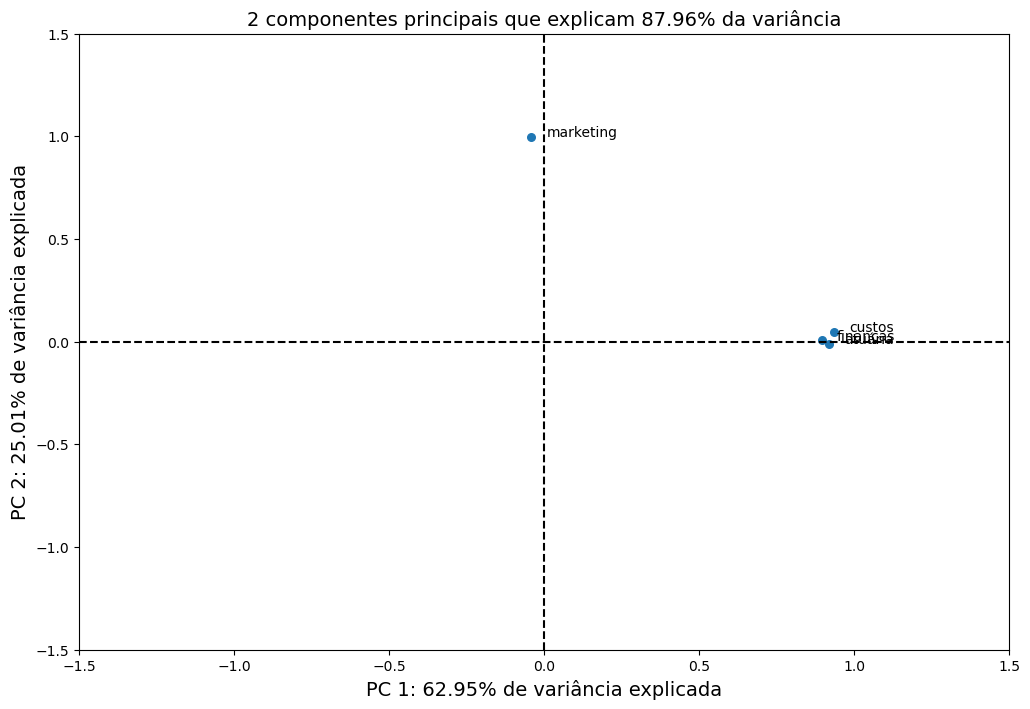

In [24]:
# Gráfico das cargas fatoriais e suas variâncias nos componentes principais
# Loading plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

tabela_cargas_chart = tabela_cargas.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=30)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"PC 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"PC 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

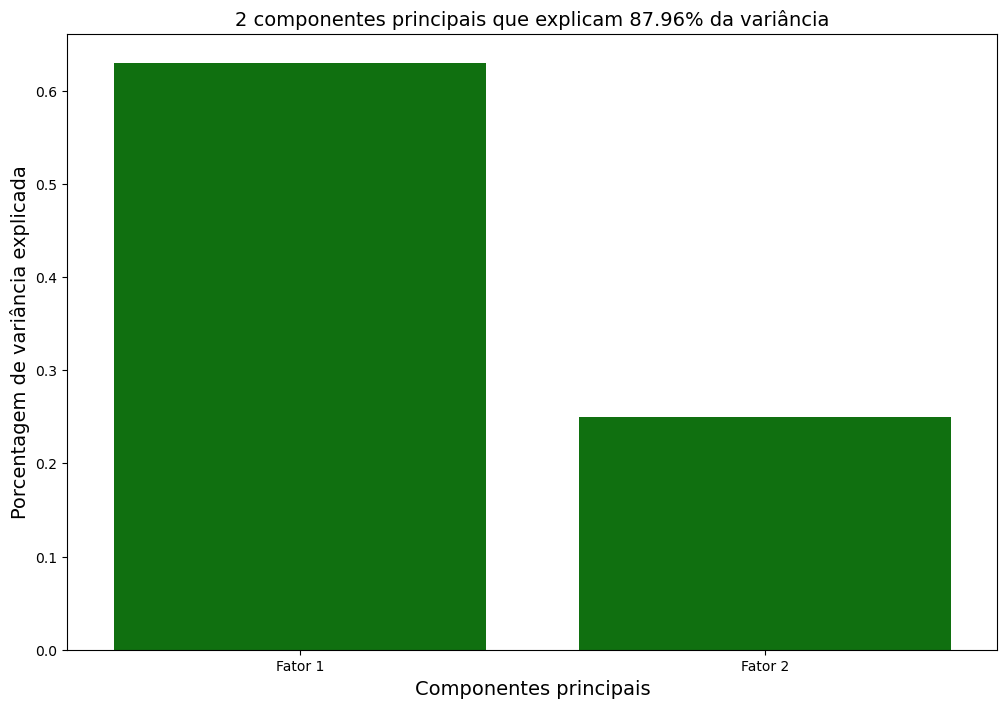

In [25]:
#%% Gráfico da variância acumulada dos componentes principais

plt.figure(figsize=(12,8))

plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, color='green')
plt.xlabel("Componentes principais", fontsize=14)
plt.ylabel("Porcentagem de variância explicada", fontsize=14)
plt.show()

# Exemplo 2: Preço das Casas

## 2.1. Base de dados

In [64]:
# Importando os dados
df = pd.read_excel("datasets/preco_casas.xlsx")

In [65]:
#%% Visualizando os dados e cada uma das variáveis

df


,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value
0,201,177,3,1,3.3,10,6.8,0.90,165432
1,196,182,4,3,1.2,11,4.1,1.42,187043
2,198,182,4,4,5.9,20,2.1,4.12,148658
3,178,166,2,3,5.9,5,0.7,4.36,123785
4,183,165,3,1,3.8,8,0.7,0.42,156470
...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,2.9,20,4.1,3.99,235882
4950,302,282,4,2,3.8,12,4.8,2.09,290995
4951,153,147,3,4,3.3,7,4.7,3.98,106428
4952,180,158,2,1,2.2,1,3.4,3.75,107579


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   distance_to_school          4954 non-null   float64
 5   house_age                   4954 non-null   int64  
 6   distance_to_supermarket_km  4954 non-null   float64
 7   crime_rate_index            4954 non-null   float64
 8   property_value              4954 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 348.5 KB


In [67]:
# Estatísticas descritivas
summary = df.describe(include = 'all')
summary

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,250.131409,231.250908,3.788252,3.199839,3.454219,11.444691,3.508639,2.986110,201974.738999
std,103.131939,94.571642,1.585371,1.602300,2.007358,6.356991,1.991266,1.737742,90031.882219
min,100.000000,85.000000,1.000000,1.000000,0.100000,1.000000,0.100000,0.010000,32622.000000
25%,180.000000,165.000000,3.000000,2.000000,1.700000,6.000000,1.800000,1.470000,136777.000000
50%,235.000000,217.500000,4.000000,3.000000,3.400000,11.000000,3.500000,3.020000,194515.500000
75%,295.000000,274.000000,5.000000,4.000000,5.200000,17.000000,5.300000,4.490000,246590.000000
max,796.000000,760.000000,8.000000,9.000000,6.900000,22.000000,6.900000,5.990000,692086.000000


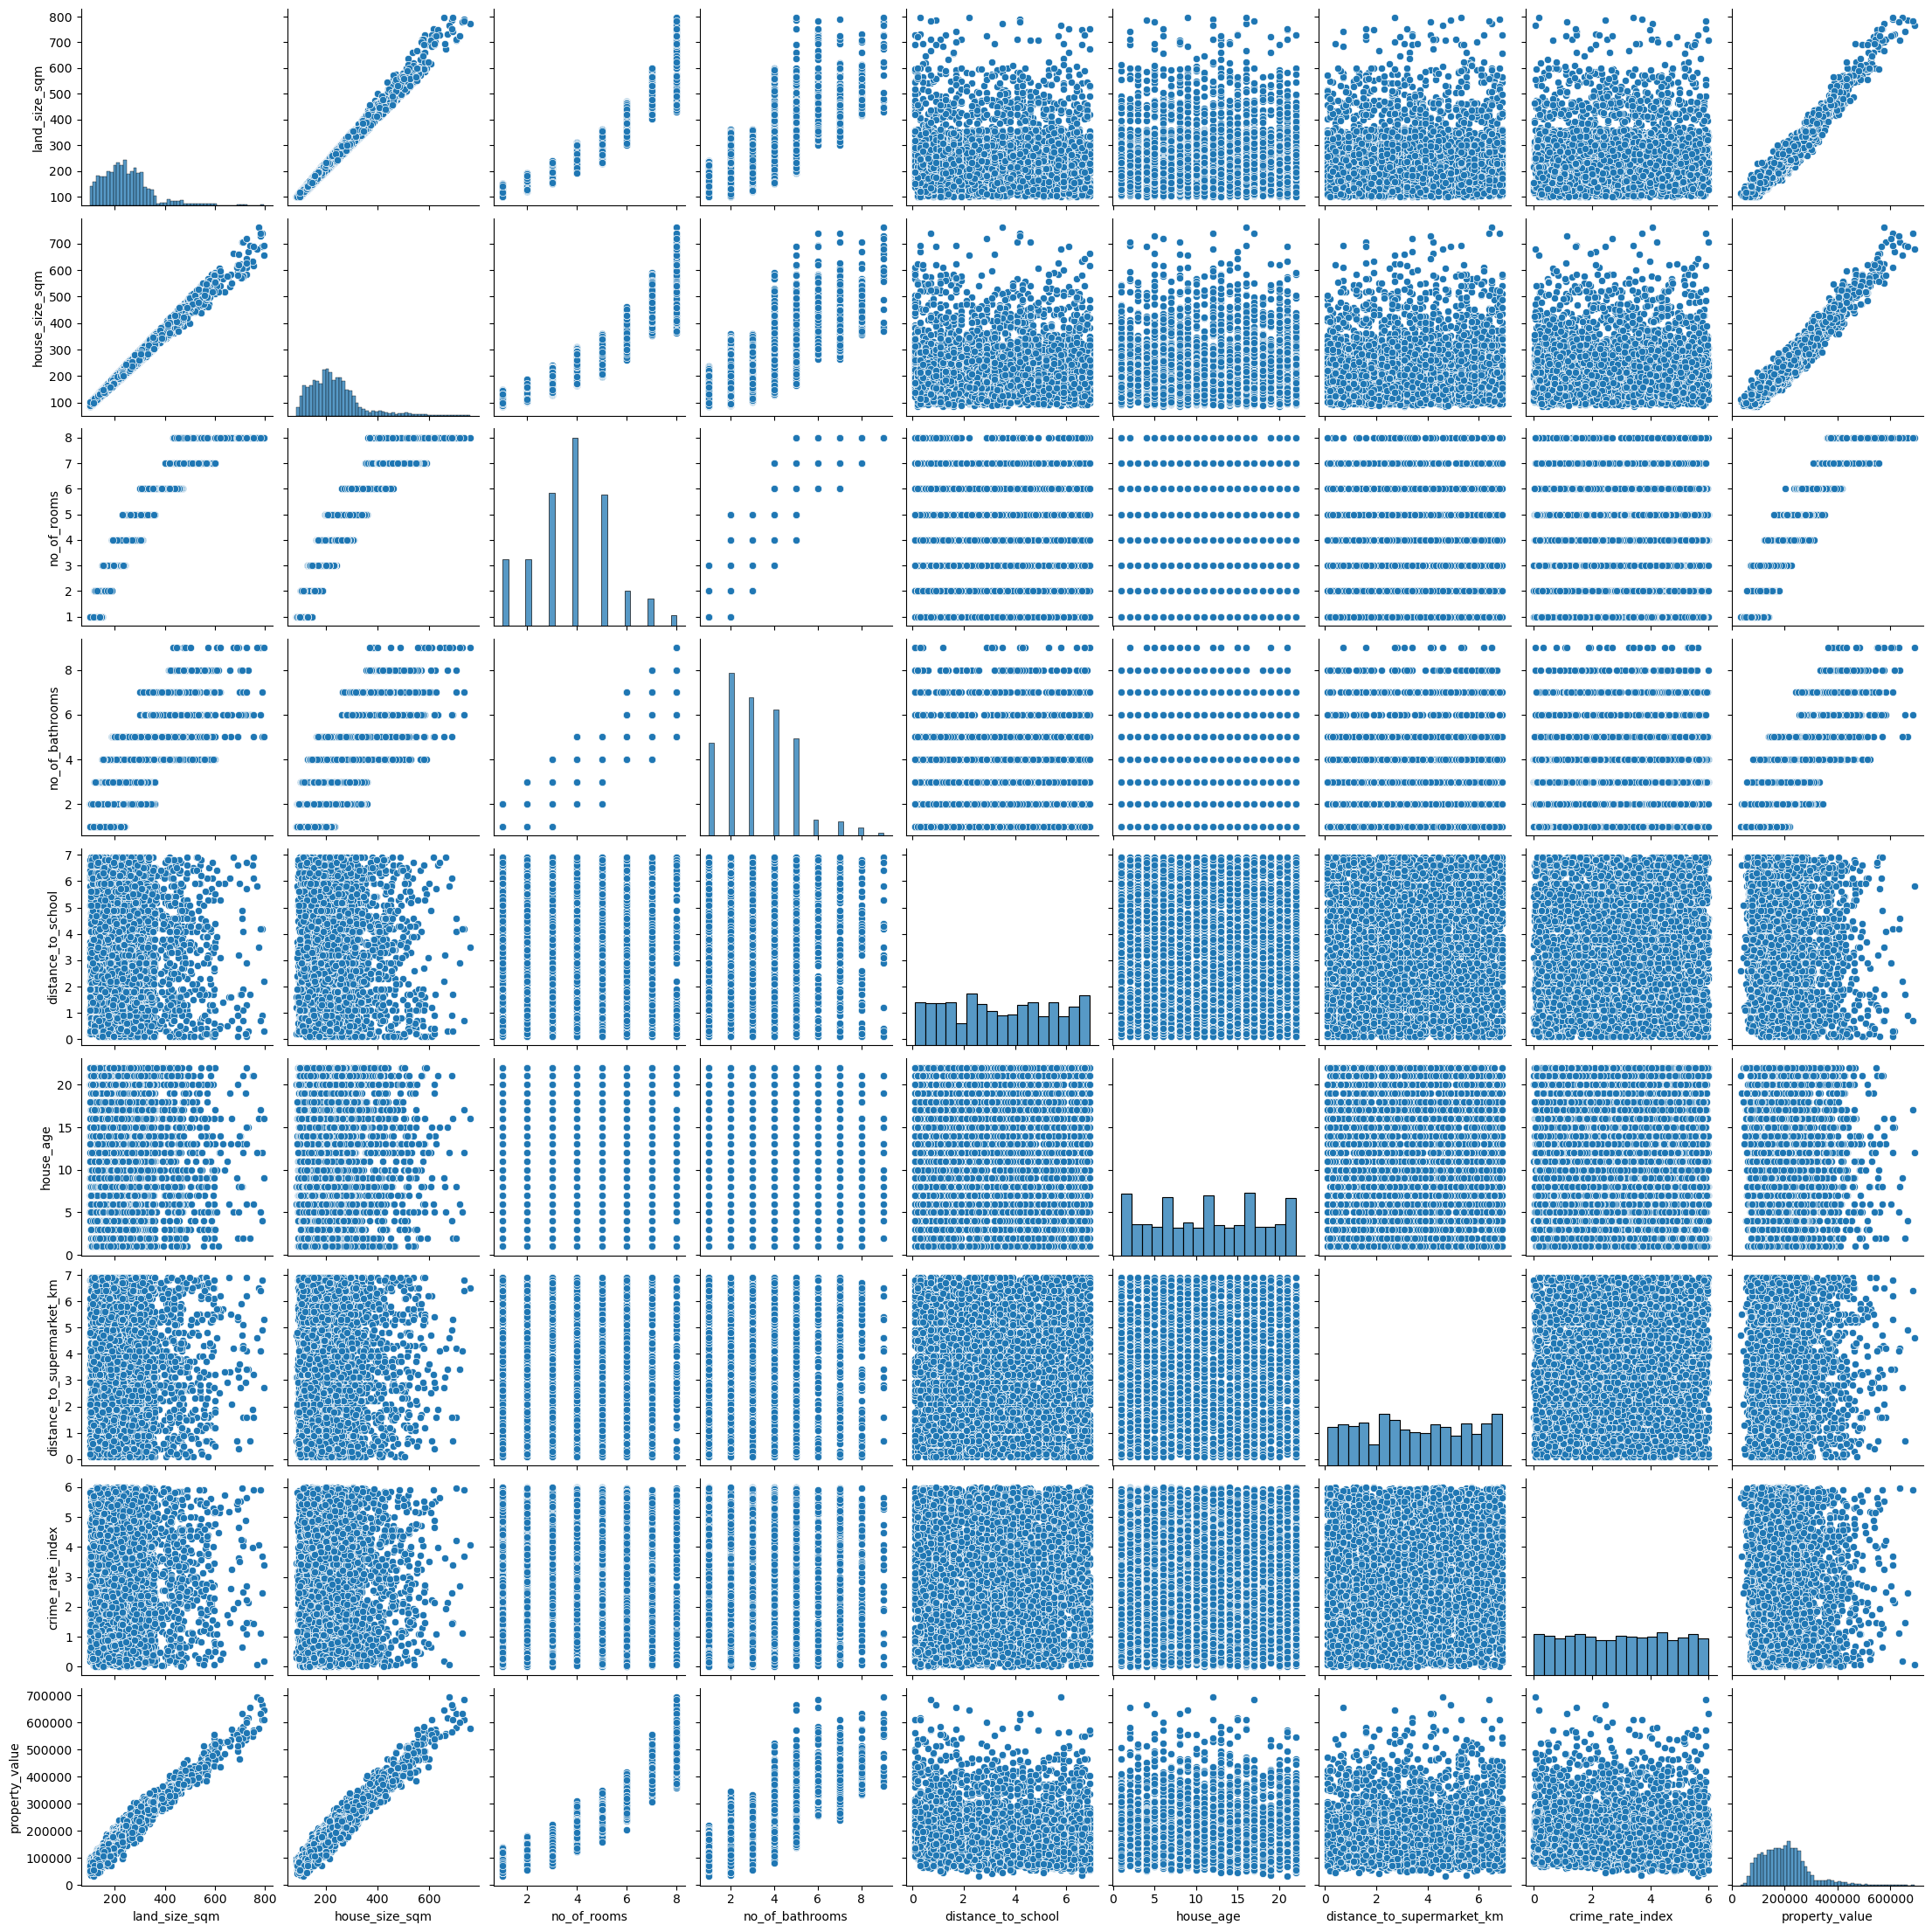

In [68]:
# Pairplot

sns.pairplot(df)
plt.show()

In [69]:
#%% Separando somente as variáveis quantitativas explicativas do banco de dados

df_pca = df.iloc[:, :-1]

df_pca

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index
0,201,177,3,1,3.3,10,6.8,0.90
1,196,182,4,3,1.2,11,4.1,1.42
2,198,182,4,4,5.9,20,2.1,4.12
3,178,166,2,3,5.9,5,0.7,4.36
4,183,165,3,1,3.8,8,0.7,0.42
...,...,...,...,...,...,...,...,...
4949,297,261,4,4,2.9,20,4.1,3.99
4950,302,282,4,2,3.8,12,4.8,2.09
4951,153,147,3,4,3.3,7,4.7,3.98
4952,180,158,2,1,2.2,1,3.4,3.75


## 2.2. PCA

### 1º Passo: Correlação de Pearson

In [70]:
#%% Matriz de correlaçãoes entre as variáveis

matriz_corr = pg.rcorr(df_pca, method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
matriz_corr


,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index
land_size_sqm,-,***,***,***,,,,
house_size_sqm,0.9914,-,***,***,,,,
no_of_rooms,0.8983,0.8948,-,***,,,,
no_of_bathrooms,0.6798,0.6777,0.71,-,,,,
distance_to_school,-0.0111,-0.0107,-0.0062,-0.0083,-,,,
house_age,0.0065,0.0082,0.0035,0.001,0.0115,-,,
distance_to_supermarket_km,0.0047,0.002,-0.0073,-0.0025,0.0101,-0.0028,-,
crime_rate_index,0.0078,0.008,0.0146,0.0107,-0.0021,-0.0007,0.018,-


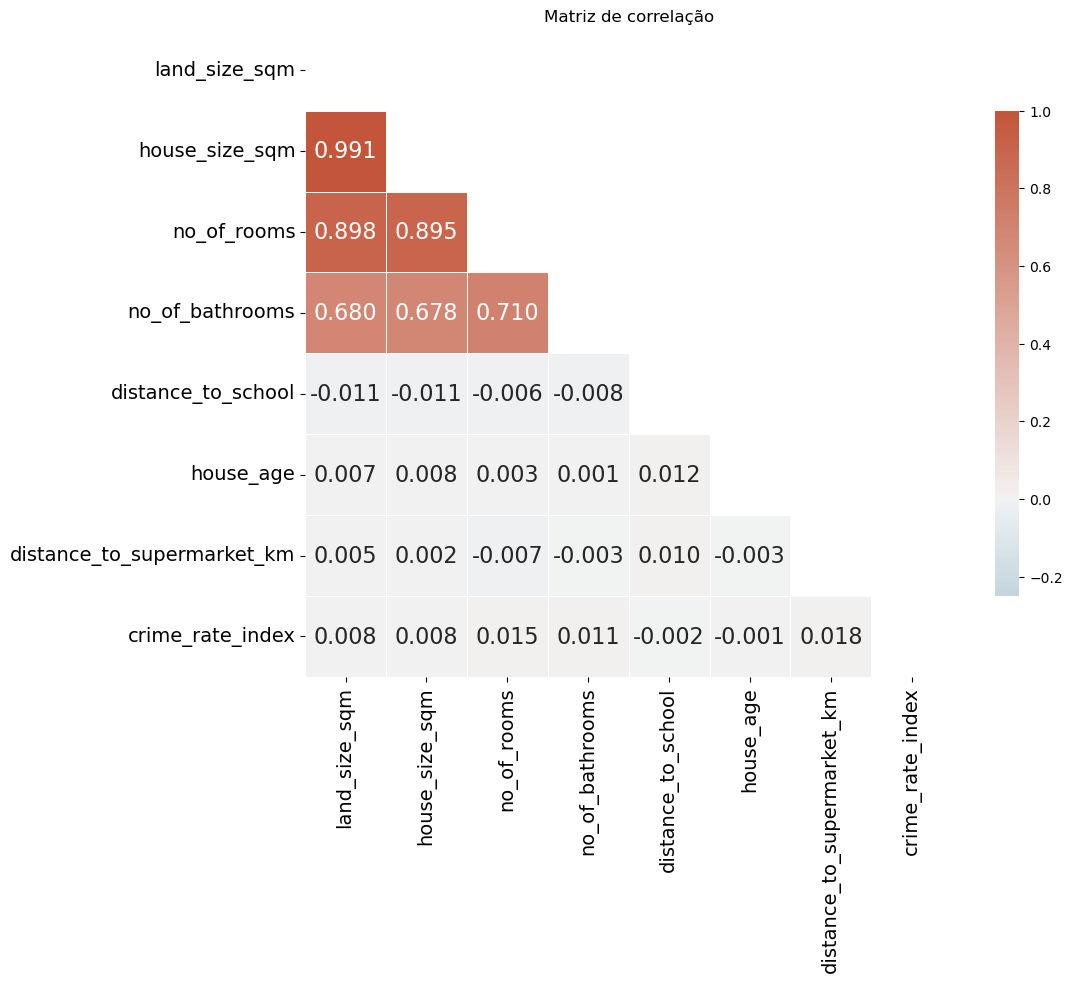

In [71]:
#%% Outra maneira de plotar as mesmas informações

corr = df_pca.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(df_pca.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Matriz de correlação')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

### 2º Passo: Teste de Esferecidade de Bartlett

In [72]:
#%% Teste de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(df_pca)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 31857.45566643562
p-value : 0.0


### 3º Passo: PCA

In [73]:
#%% Definindo a PCA (procedimento preliminar)

fa = FactorAnalyzer()
fa.fit(df_pca)

FactorAnalyzer(rotation_kwargs={})

In [74]:
#%% Obtendo os Eigenvalues (autovalores)

ev, v = fa.get_eigenvalues()

print(ev)


# Critério de Kaiser

# Verificar autovalores com valores maiores que 1
# Existem trẽs componentes acima de 1


[3.44078793 1.01989592 1.01155913 0.99164638 0.97675882 0.42231466
 0.128448   0.00858917]


In [75]:
#%% Parametrizando a PCA para dois fatores (autovalores > 1)

fa.set_params(n_factors = 3, method = 'principal', rotation = None)
fa.fit(df_pca)

FactorAnalyzer(method='principal', rotation=None, rotation_kwargs={})

In [76]:
#%% Eigenvalues, variâncias e variâncias acumulada

eigen_fatores = fa.get_factor_variance()
eigen_fatores

tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

tabela_eigen

,Autovalor,Variância,Variância Acumulada
Fator 1,3.440788,0.430098,0.430098
Fator 2,1.019896,0.127487,0.557585
Fator 3,1.011559,0.126445,0.684030


In [77]:
#%% Determinando as cargas fatoriais

cargas_fatores = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = df_pca.columns
tabela_cargas

tabela_cargas

,Fator 1,Fator 2,Fator 3
land_size_sqm,0.969318,0.000670,0.003416
house_size_sqm,0.967866,-0.000800,0.005045
no_of_rooms,0.948705,-0.002536,0.002939
no_of_bathrooms,0.814810,-0.002453,-0.002870
distance_to_school,-0.013787,0.349991,0.642441
house_age,0.007448,0.080374,0.692606
distance_to_supermarket_km,-0.000987,0.720297,-0.113461
crime_rate_index,0.015520,0.610001,-0.325882


In [78]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = df_pca.columns


tabela_comunalidades

,Comunalidades
land_size_sqm,0.939590
house_size_sqm,0.936791
no_of_rooms,0.900057
no_of_bathrooms,0.663930
distance_to_school,0.535414
house_age,0.486218
distance_to_supermarket_km,0.531702
crime_rate_index,0.478541


In [79]:
#%% Resultados dos fatores para as observações do dataset (predict)

predict_fatores= pd.DataFrame(fa.transform(df_pca))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]

predict_fatores

,Fator 1,Fator 2,Fator 3
0,-0.763931,0.409791,-0.005071
1,-0.286895,-0.720208,-0.507750
2,-0.132644,0.413418,1.559236
3,-0.734837,-0.181887,-0.025554
4,-0.850848,-1.858475,0.369112
...,...,...,...
4949,0.378174,0.565149,0.528827
4950,0.149131,0.216979,0.269514
4951,-0.533601,0.683343,-0.789444
4952,-1.044735,-0.113250,-1.662989


In [80]:
# Adicionando ao dataset 

df = pd.concat([df.reset_index(drop=True), predict_fatores], axis=1)

df

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value,Fator 1,Fator 2,Fator 3
0,201,177,3,1,3.3,10,6.8,0.90,165432,-0.763931,0.409791,-0.005071
1,196,182,4,3,1.2,11,4.1,1.42,187043,-0.286895,-0.720208,-0.507750
2,198,182,4,4,5.9,20,2.1,4.12,148658,-0.132644,0.413418,1.559236
3,178,166,2,3,5.9,5,0.7,4.36,123785,-0.734837,-0.181887,-0.025554
4,183,165,3,1,3.8,8,0.7,0.42,156470,-0.850848,-1.858475,0.369112
...,...,...,...,...,...,...,...,...,...,...,...,...
4949,297,261,4,4,2.9,20,4.1,3.99,235882,0.378174,0.565149,0.528827
4950,302,282,4,2,3.8,12,4.8,2.09,290995,0.149131,0.216979,0.269514
4951,153,147,3,4,3.3,7,4.7,3.98,106428,-0.533601,0.683343,-0.789444
4952,180,158,2,1,2.2,1,3.4,3.75,107579,-1.044735,-0.113250,-1.662989


In [81]:
# Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = df_pca.columns

tabela_scores


,Fator 1,Fator 2,Fator 3
land_size_sqm,0.281714,0.000657,0.003377
house_size_sqm,0.281292,-0.000784,0.004987
no_of_rooms,0.275723,-0.002487,0.002906
no_of_bathrooms,0.236809,-0.002405,-0.002837
distance_to_school,-0.004007,0.343163,0.635100
house_age,0.002165,0.078806,0.684691
distance_to_supermarket_km,-0.000287,0.706245,-0.112164
crime_rate_index,0.004510,0.598101,-0.322158


In [83]:
#%% Correlação entre os fatores

# A seguir, verifica-se que a correlação entre os fatores é zero (ortogonais)

corr_fator = pg.rcorr(df[['Fator 1','Fator 2', 'Fator 3']], method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
corr_fator


,Fator 1,Fator 2,Fator 3
Fator 1,-,,
Fator 2,0.0,-,
Fator 3,0.0,-0.0,-


In [84]:
#%% Criando um ranking

df['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    df['Ranking'] = df['Ranking'] + df[tabela_eigen.index[index]]*variancia

    

df = df.sort_values(by='Ranking', ascending=False)
df

,land_size_sqm,house_size_sqm,no_of_rooms,no_of_bathrooms,distance_to_school,house_age,distance_to_supermarket_km,crime_rate_index,property_value,Fator 1,Fator 2,Fator 3,Ranking
1272,773,760,8,9,3.5,16,6.5,4.08,576789,4.595015,1.485529,0.176303,2.187987
2165,727,642,8,9,6.7,15,4.1,5.64,549116,4.116004,1.706603,0.919358,2.104105
1700,788,737,8,7,4.2,12,6.8,3.70,609407,4.268170,1.534514,0.023299,2.034310
3245,767,678,8,9,5.8,12,4.6,0.06,692086,4.318585,-0.227890,1.321044,1.995403
2080,749,634,8,6,6.6,21,1.9,3.98,548638,3.707133,0.416845,1.971345,1.896841
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,101,96,1,1,1.2,4,2.2,1.03,80127,-1.622788,-1.607367,-1.092035,-1.040959
4214,107,103,1,1,1.1,6,1.4,0.23,87009,-1.586654,-2.158828,-0.714283,-1.047958
1910,100,85,1,1,1.6,6,0.7,0.29,87039,-1.660063,-2.300881,-0.528943,-1.074205
3676,106,103,1,1,0.8,3,1.3,1.67,88692,-1.586057,-1.787117,-1.393747,-1.086227


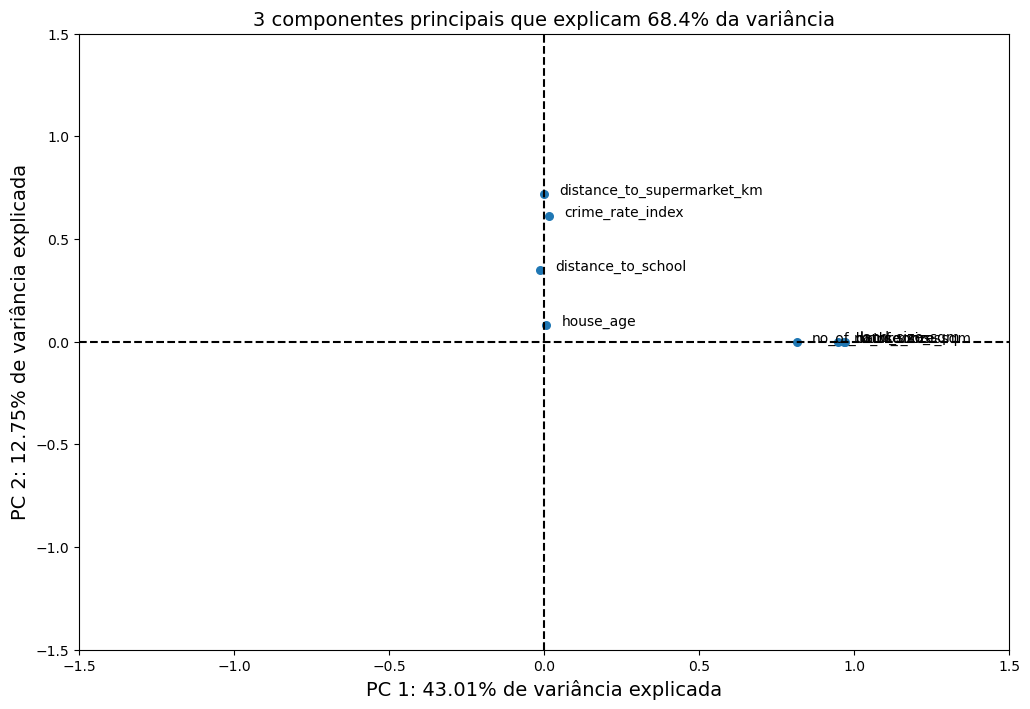

In [85]:
# Gráfico das cargas fatoriais e suas variâncias nos componentes principais
# Loading plot com as cargas dos 2 primeiros fatores
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

tabela_cargas_chart = tabela_cargas.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=30)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"PC 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"PC 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

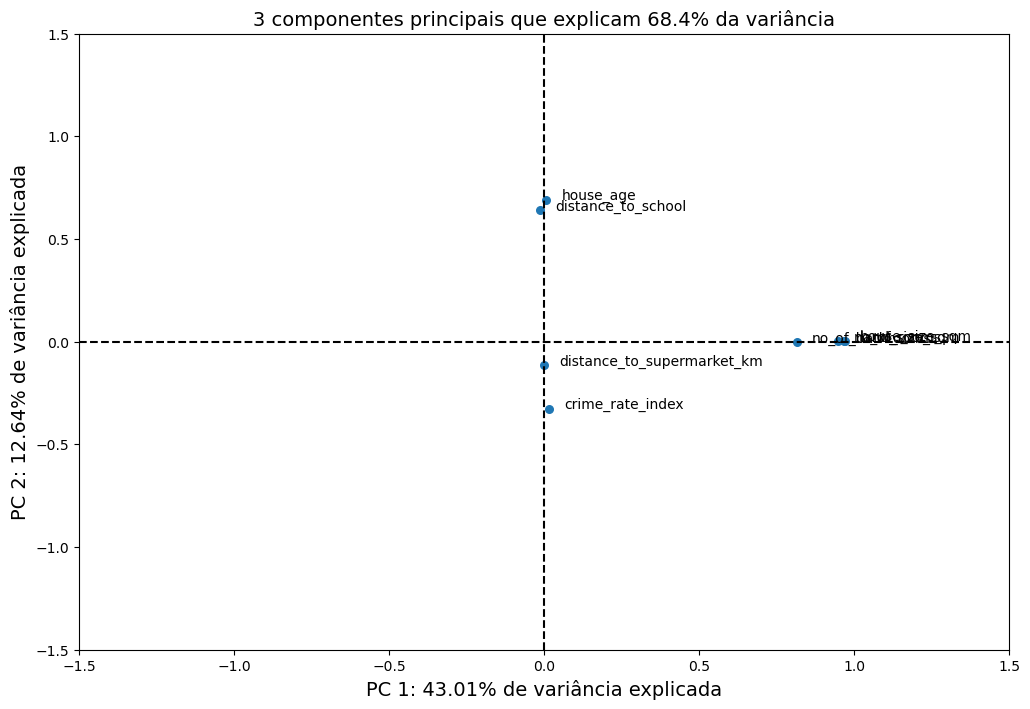

In [86]:
# Gráfico das cargas fatoriais e suas variâncias nos componentes principais
# Loading plot com as cargas dos primeiro e terceiro fator
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

tabela_cargas_chart = tabela_cargas.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 3'], s=30)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 3'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"PC 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"PC 2: {round(tabela_eigen.iloc[2]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

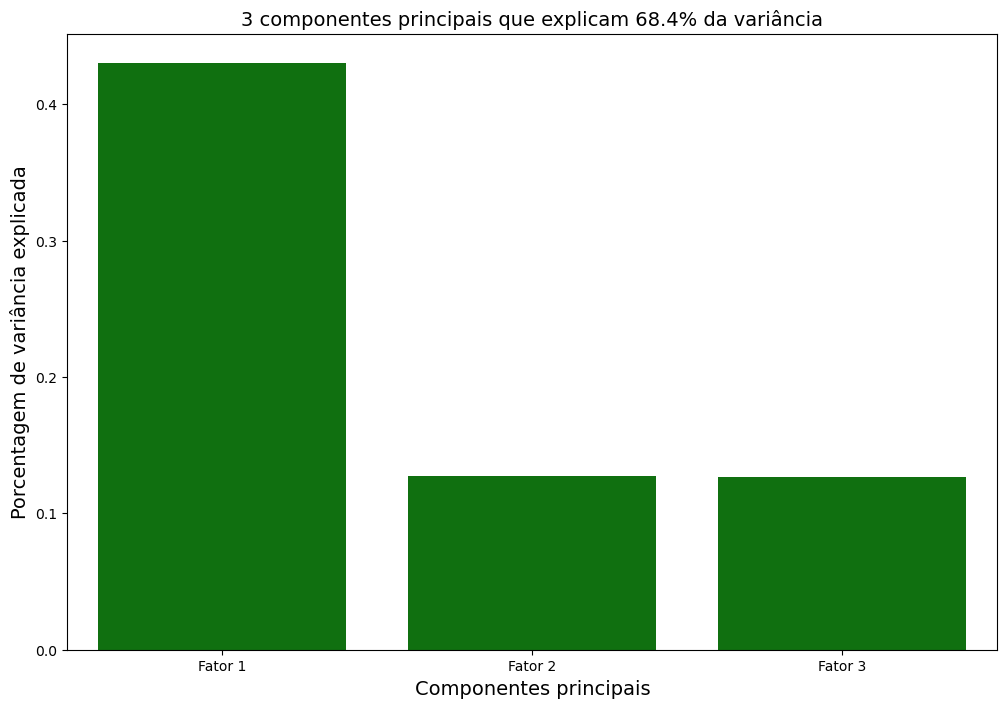

In [87]:
#%% Gráfico da variância acumulada dos componentes principais

plt.figure(figsize=(12,8))

plt.title(f"{tabela_eigen.shape[0]} componentes principais que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=14)
sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, color='green')
plt.xlabel("Componentes principais", fontsize=14)
plt.ylabel("Porcentagem de variância explicada", fontsize=14)
plt.show()

# Exemplo 3: Preço das Casas

## 3.1. Base de dados

In [127]:
# Importando os dados
df = pd.read_excel("datasets/indicador_país.xlsx")

In [128]:
#%% Visualizando os dados e cada uma das variáveis

df.head(5)


,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2
0,Argentina,2.9,5.8836,10749.3193,9.7,2.9,5.2538,11601.6299,9.8
1,Australia,8.7,0.7800,25190.8398,11.8,8.7,0.7800,25306.8242,11.9
2,Austria,7.9,0.7077,26642.9941,11.8,7.9,0.8094,27266.4043,11.8
3,Belgium,7.1,1.6349,24550.3965,12.0,7.1,1.3524,24733.6270,12.1
4,Brazil,3.7,25.0808,4716.6143,6.7,3.7,24.4085,4803.3984,6.8


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   país         50 non-null     object 
 1   cpi1         50 non-null     float64
 2   violência1   50 non-null     float64
 3   pib_capita1  50 non-null     float64
 4   escol1       50 non-null     float64
 5   cpi2         50 non-null     float64
 6   violência2   50 non-null     float64
 7   pib_capita2  50 non-null     float64
 8   escol2       50 non-null     float64
dtypes: float64(8), object(1)
memory usage: 3.6+ KB


In [130]:
# Estatísticas descritivas
summary = df.describe(include = 'all')
summary

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2
count,50,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.518000,7.092374,15091.204106,10.25800,5.500000,6.645060,15294.015810,10.350000
std,NaN,2.374154,13.207847,12281.213696,2.34626,2.361079,12.592332,12371.638318,2.332228
min,NaN,1.900000,0.459600,794.801300,6.10000,2.000000,0.435000,837.746400,6.200000
25%,NaN,3.525000,0.897225,3994.237550,8.20000,3.500000,0.902000,4069.669950,8.300000
50%,NaN,4.950000,1.616700,11546.507800,10.60000,5.000000,1.656200,11651.563000,10.650000
75%,NaN,7.700000,6.450225,25362.916500,12.27500,7.750000,6.134375,25776.672875,12.375000


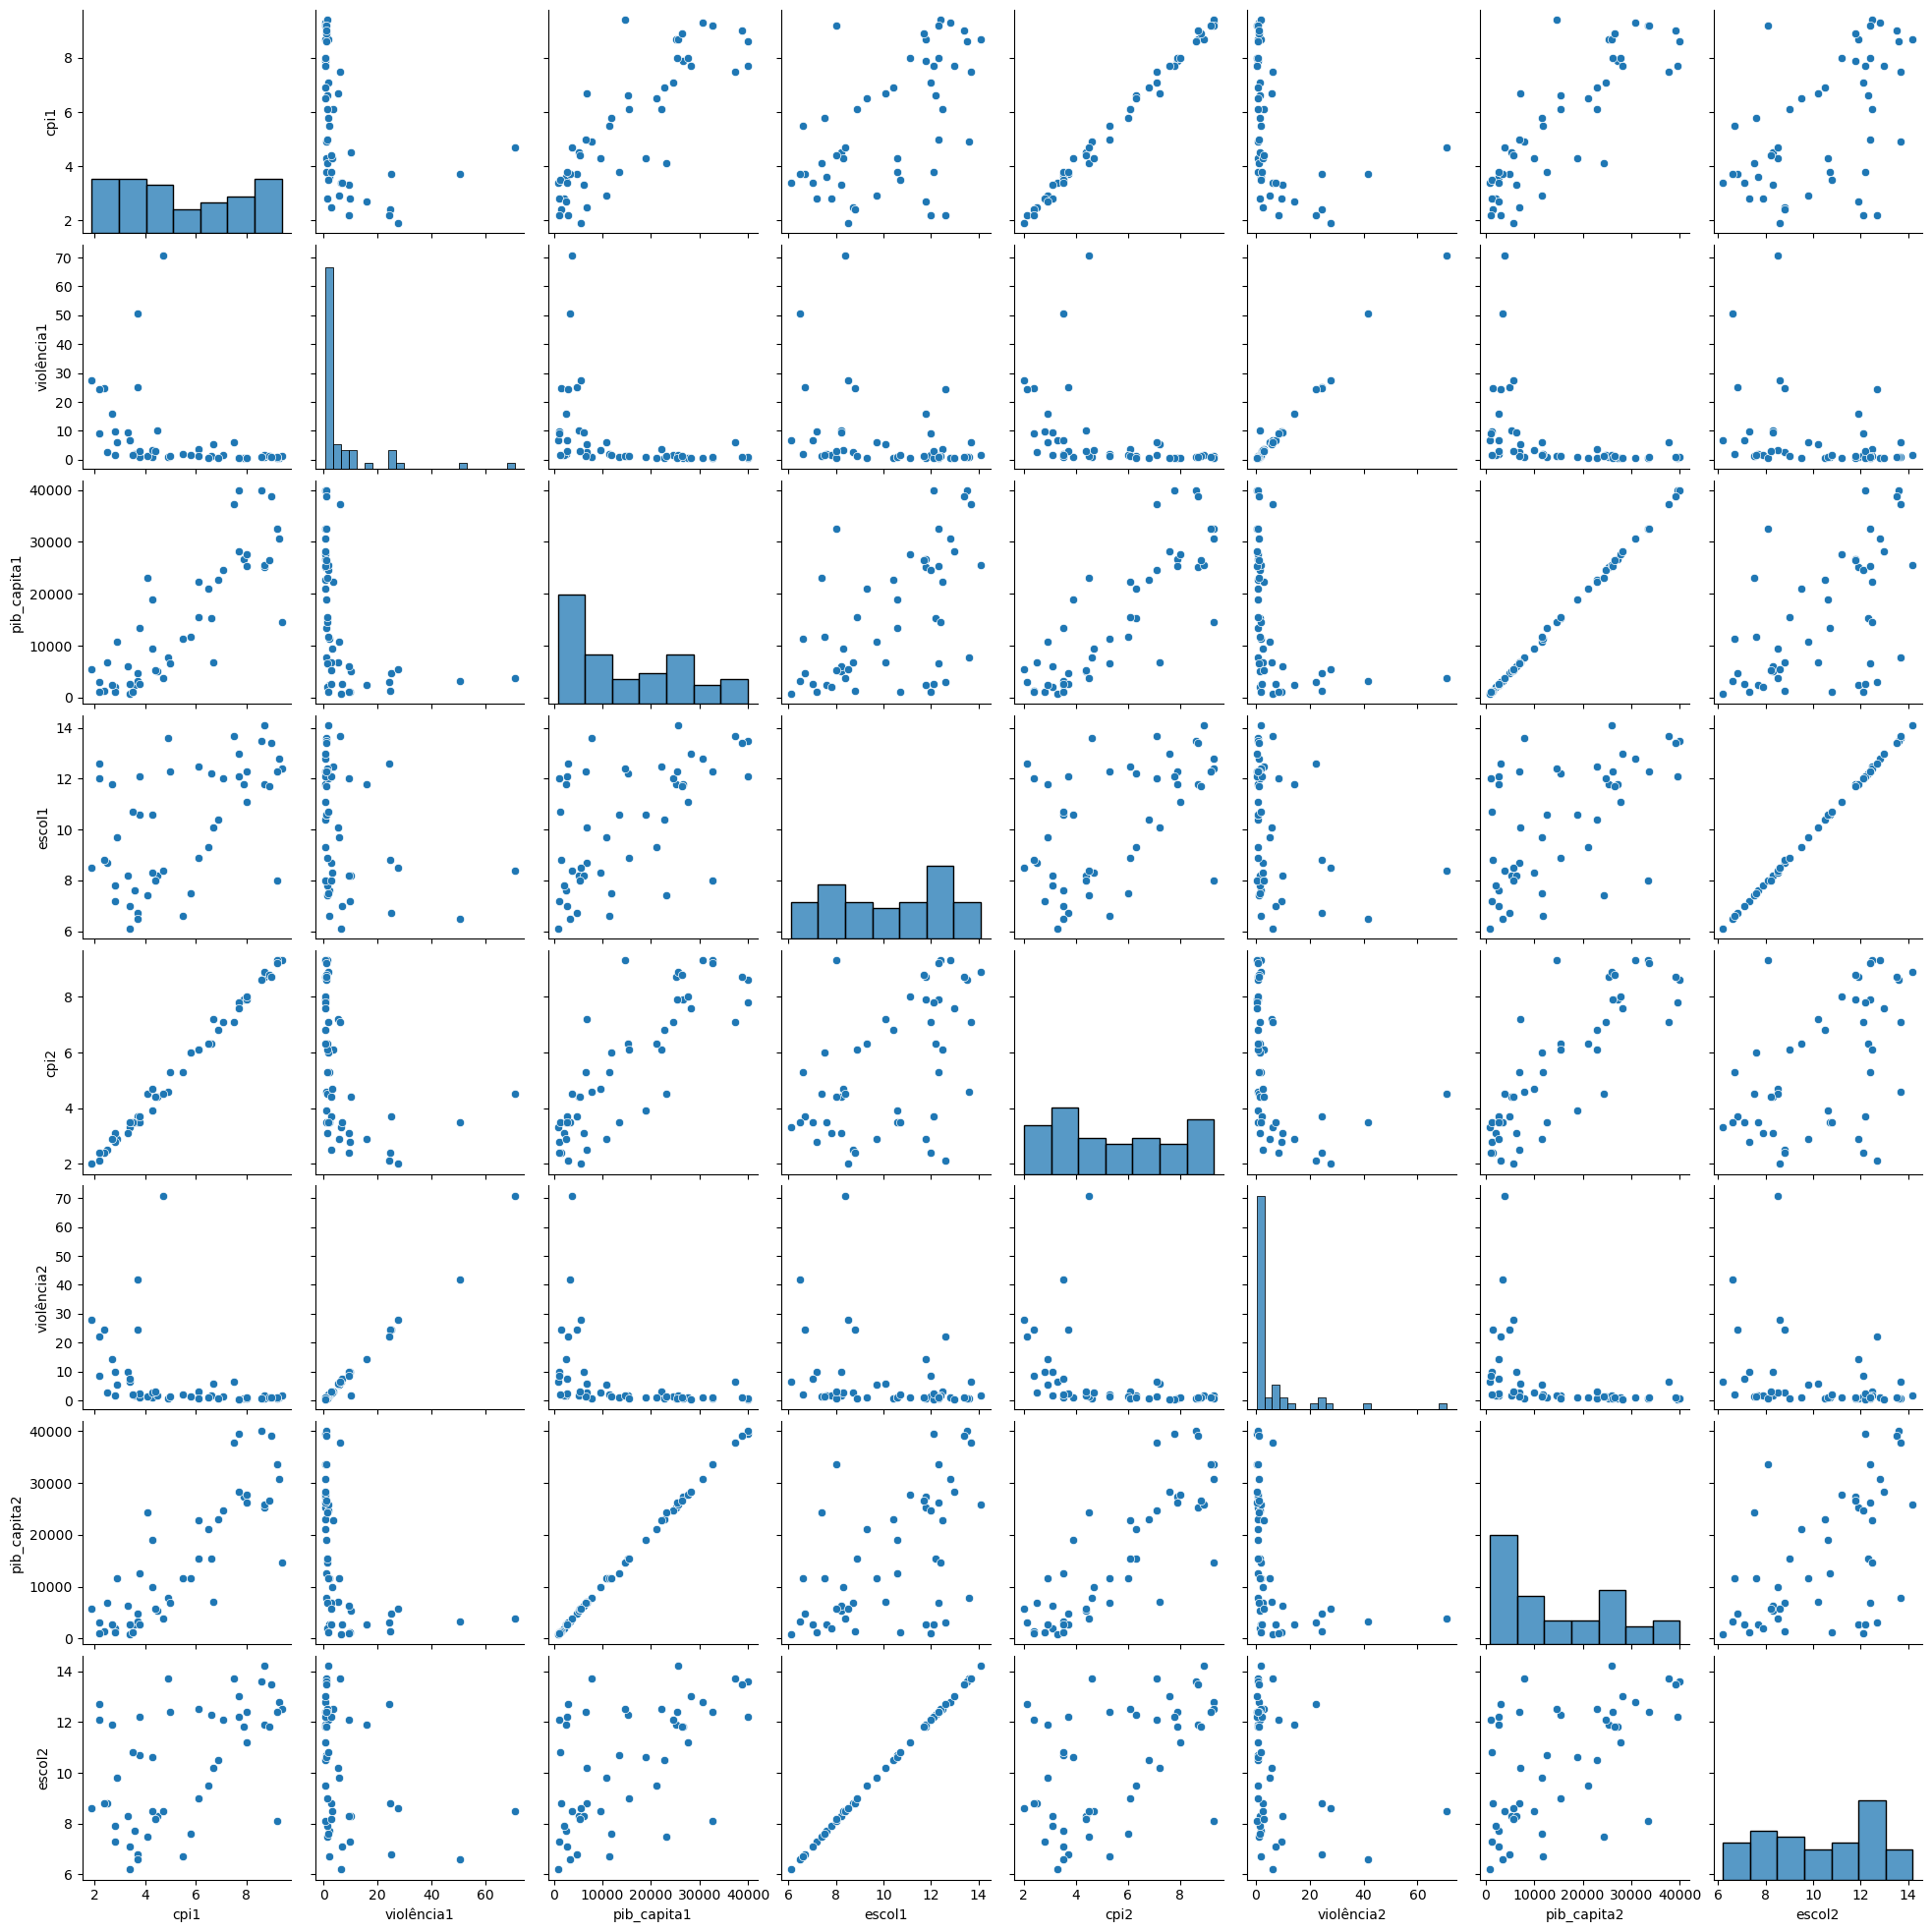

In [131]:
# Pairplot

sns.pairplot(df)
plt.show()

In [132]:
#%% Separando somente as variáveis quantitativas para o primeiro ano

df_pca1 = df.iloc[:, 1:5]

df_pca1.head(5)

,cpi1,violência1,pib_capita1,escol1
0,2.9,5.8836,10749.3193,9.7
1,8.7,0.7800,25190.8398,11.8
2,7.9,0.7077,26642.9941,11.8
3,7.1,1.6349,24550.3965,12.0
4,3.7,25.0808,4716.6143,6.7


In [133]:
#%% Separando somente as variáveis quantitativas para o primeiro ano

df_pca2 = df.iloc[:, 5:]

df_pca2.head(5)

,cpi2,violência2,pib_capita2,escol2
0,2.9,5.2538,11601.6299,9.8
1,8.7,0.7800,25306.8242,11.9
2,7.9,0.8094,27266.4043,11.8
3,7.1,1.3524,24733.6270,12.1
4,3.7,24.4085,4803.3984,6.8


## 3.2. PCA 1º Ano

### 1º Passo: Correlação de Pearson

In [134]:
#%% Matriz de correlaçãoes entre as variáveis

matriz_corr = pg.rcorr(df_pca1, method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
matriz_corr


,cpi1,violência1,pib_capita1,escol1
cpi1,-,***,***,***
violência1,-0.392,-,***,**
pib_capita1,0.8536,-0.4158,-,***
escol1,0.5447,-0.3236,0.5608,-


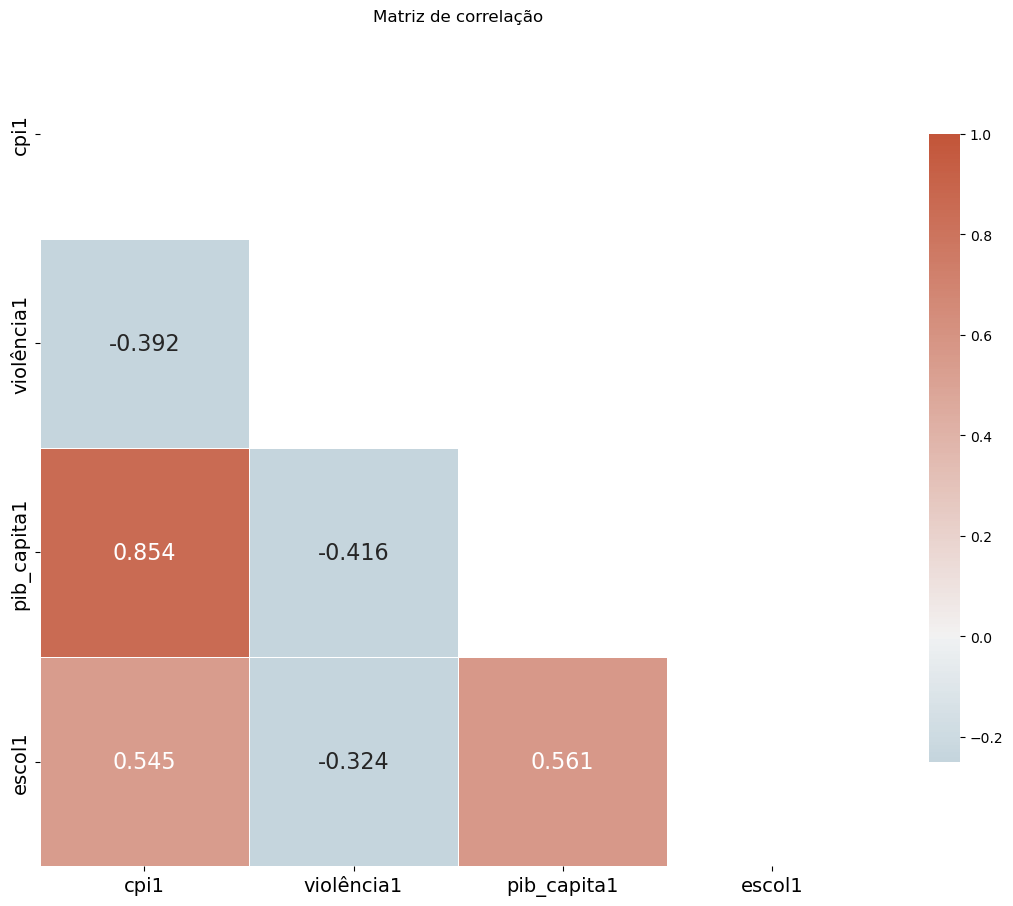

In [135]:
#%% Outra maneira de plotar as mesmas informações

corr = df_pca1.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(df_pca1.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Matriz de correlação')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

### 2º Passo: Teste de Esferecidade de Bartlett

In [136]:
#%% Teste de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(df_pca1)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 89.63658068675535
p-value : 3.6051090393766536e-17


### 3º Passo: PCA

In [137]:
#%% Definindo a PCA (procedimento preliminar)

fa = FactorAnalyzer()
fa.fit(df_pca1)

FactorAnalyzer(rotation_kwargs={})

In [138]:
#%% Obtendo os Eigenvalues (autovalores)

ev, v = fa.get_eigenvalues()

print(ev)


# Critério de Kaiser

# Verificar autovalores com valores maiores que 1
# Existe um componente acima de 1


[2.5887211  0.72989475 0.53565237 0.14573178]


In [139]:
#%% Parametrizando a PCA para dois fatores (autovalores > 1)

fa.set_params(n_factors = 1, method = 'principal', rotation = None)
fa.fit(df_pca1)

FactorAnalyzer(method='principal', n_factors=1, rotation=None,
               rotation_kwargs={})

In [140]:
#%% Eigenvalues, variâncias e variâncias acumulada

eigen_fatores = fa.get_factor_variance()
eigen_fatores



(array([2.5887211]), array([0.64718028]), array([0.64718028]))

In [141]:
tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

tabela_eigen

,Autovalor,Variância,Variância Acumulada
Fator 1,2.588721,0.64718,0.64718


In [142]:
#%% Determinando as cargas fatoriais

cargas_fatores = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = df_pca1.columns

tabela_cargas

,Fator 1
cpi1,-0.900188
violência1,0.614414
pib_capita1,-0.911153
escol1,-0.755432


In [143]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = df_pca1.columns


tabela_comunalidades

,Comunalidades
cpi1,0.810339
violência1,0.377505
pib_capita1,0.830200
escol1,0.570677


In [144]:
#%% Resultados dos fatores para as observações do dataset (predict)

predict_fatores= pd.DataFrame(fa.transform(df_pca1))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]

predict_fatores.head(5)

,Fator 1
0,0.561206
1,-1.071493
2,-0.996483
3,-0.825835
4,1.342877


In [145]:
# Adicionando ao dataset 
df['Fator_ano1'] = predict_fatores['Fator 1']

df.head(5)

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2,Fator_ano1
0,Argentina,2.9,5.8836,10749.3193,9.7,2.9,5.2538,11601.6299,9.8,0.561206
1,Australia,8.7,0.7800,25190.8398,11.8,8.7,0.7800,25306.8242,11.9,-1.071493
2,Austria,7.9,0.7077,26642.9941,11.8,7.9,0.8094,27266.4043,11.8,-0.996483
3,Belgium,7.1,1.6349,24550.3965,12.0,7.1,1.3524,24733.6270,12.1,-0.825835
4,Brazil,3.7,25.0808,4716.6143,6.7,3.7,24.4085,4803.3984,6.8,1.342877


In [146]:
# Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = df_pca1.columns

tabela_scores


,Fator 1
cpi1,-0.347735
violência1,0.237343
pib_capita1,-0.351970
escol1,-0.291817


## 3.3. PCA 2º Ano

### 1º Passo: Correlação de Pearson

In [147]:
#%% Matriz de correlaçãoes entre as variáveis

matriz_corr = pg.rcorr(df_pca2, method = 'pearson', upper = 'pval', decimals = 4, pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})
matriz_corr


,cpi2,violência2,pib_capita2,escol2
cpi2,-,***,***,***
violência2,-0.3921,-,***,**
pib_capita2,0.846,-0.4026,-,***
escol2,0.5342,-0.3127,0.5556,-


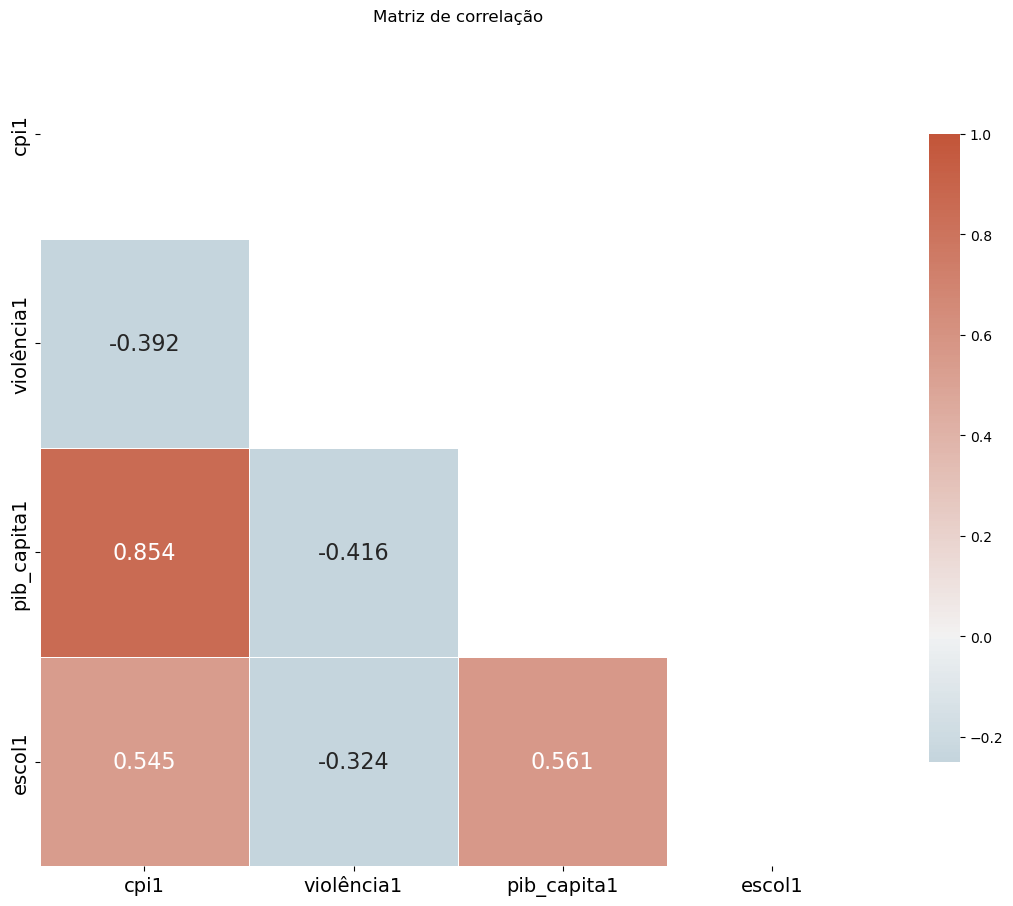

In [148]:
#%% Outra maneira de plotar as mesmas informações

corr = df_pca2.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, n=256, as_cmap=True)

sns.heatmap(df_pca1.corr(), 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin = -.25,
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.3f', 
            annot_kws={'size': 16},
            cbar_kws={"shrink": .75})

plt.title('Matriz de correlação')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 14)
ax.set_ylim(len(corr))

plt.show()

### 2º Passo: Teste de Esferecidade de Bartlett

In [149]:
#%% Teste de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(df_pca2)

print(f'Bartlett statistic: {bartlett}')

print(f'p-value : {p_value}')

Bartlett statistic: 86.48323533730893
p-value : 1.626514294313331e-16


### 3º Passo: PCA

In [150]:
#%% Definindo a PCA (procedimento preliminar)

fa = FactorAnalyzer()
fa.fit(df_pca2)

FactorAnalyzer(rotation_kwargs={})

In [151]:
#%% Obtendo os Eigenvalues (autovalores)

ev, v = fa.get_eigenvalues()

print(ev)


# Critério de Kaiser

# Verificar autovalores com valores maiores que 1
# Existe um componente acima de 1


[2.56596625 0.73740672 0.54309917 0.15352786]


In [152]:
#%% Parametrizando a PCA para dois fatores (autovalores > 1)

fa.set_params(n_factors = 1, method = 'principal', rotation = None)
fa.fit(df_pca2)

FactorAnalyzer(method='principal', n_factors=1, rotation=None,
               rotation_kwargs={})

In [153]:
#%% Eigenvalues, variâncias e variâncias acumulada

eigen_fatores = fa.get_factor_variance()
eigen_fatores



(array([2.56596625]), array([0.64149156]), array([0.64149156]))

In [154]:
tabela_eigen = pd.DataFrame(eigen_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

tabela_eigen

,Autovalor,Variância,Variância Acumulada
Fator 1,2.565966,0.641492,0.641492


In [155]:
#%% Determinando as cargas fatoriais

cargas_fatores = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatores)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = df_pca2.columns

tabela_cargas

,Fator 1
cpi2,-0.898893
violência2,0.608385
pib_capita2,-0.908215
escol2,-0.750314


In [156]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = df_pca2.columns


tabela_comunalidades

,Comunalidades
cpi2,0.808009
violência2,0.370132
pib_capita2,0.824854
escol2,0.562972


In [157]:
#%% Resultados dos fatores para as observações do dataset (predict)

predict_fatores= pd.DataFrame(fa.transform(df_pca2))
predict_fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(predict_fatores.columns)]

predict_fatores.head(5)

,Fator 1
0,0.539585
1,-1.076836
2,-1.000343
3,-0.834912
4,1.360426


In [158]:
# Adicionando ao dataset 

df['Fator_ano2'] = predict_fatores['Fator 1']
df.head(5)

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2,Fator_ano1,Fator_ano2
0,Argentina,2.9,5.8836,10749.3193,9.7,2.9,5.2538,11601.6299,9.8,0.561206,0.539585
1,Australia,8.7,0.7800,25190.8398,11.8,8.7,0.7800,25306.8242,11.9,-1.071493,-1.076836
2,Austria,7.9,0.7077,26642.9941,11.8,7.9,0.8094,27266.4043,11.8,-0.996483,-1.000343
3,Belgium,7.1,1.6349,24550.3965,12.0,7.1,1.3524,24733.6270,12.1,-0.825835,-0.834912
4,Brazil,3.7,25.0808,4716.6143,6.7,3.7,24.4085,4803.3984,6.8,1.342877,1.360426


In [159]:
# Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = df_pca2.columns

tabela_scores


,Fator 1
cpi2,-0.350314
violência2,0.237098
pib_capita2,-0.353946
escol2,-0.292410


In [160]:
# Ordenar os dados pelo fator_ano1 em ordem decrescente
df = df.sort_values('Fator_ano1', ascending=False)
df['pos_ano1'] = range(1, len(df) + 1)

# Ordenar os dados pelo fator_ano2 em ordem decrescente
df = df.sort_values('Fator_ano2', ascending=False)
df['pos_ano2'] = range(1, len(df) + 1)

df

,país,cpi1,violência1,pib_capita1,escol1,cpi2,violência2,pib_capita2,escol2,Fator_ano1,Fator_ano2,pos_ano1,pos_ano2
39,South Africa,4.7,70.8475,3753.4453,8.4,4.5,70.8475,3825.0938,8.5,1.839992,1.936756,2,1
8,Colombia,3.7,50.4671,3218.0718,6.5,3.5,41.7733,3362.4656,6.6,1.872207,1.787651,1,2
49,Venezuela,1.9,27.6277,5528.3633,8.5,2.0,27.9401,5671.9121,8.6,1.405777,1.429315,3,3
31,Philippines,2.4,24.6610,1383.4049,8.8,2.4,24.5473,1413.3663,8.8,1.360254,1.402575,4,4
4,Brazil,3.7,25.0808,4716.6143,6.7,3.7,24.4085,4803.3984,6.8,1.342877,1.360426,5,5
16,India,3.4,6.5426,794.8013,6.1,3.3,6.2719,837.7464,6.2,1.239673,1.266018,6,6
17,Indonesia,2.8,9.6755,1145.3854,7.2,2.8,9.6755,1206.9911,7.3,1.236963,1.255705,7,7
43,Thailand,3.4,6.7044,2712.5081,7.0,3.5,7.4644,2699.1233,7.1,1.074018,1.090944,8,8
12,Egypt,2.8,1.4973,1975.5500,7.8,3.1,1.5594,1976.6149,7.9,0.989094,0.958142,9,9
26,Mexico,3.3,9.4579,6124.7095,8.2,3.1,9.9135,6288.2534,8.3,0.889246,0.941770,11,10
